# Entanglement detection

In [3]:
## import necessary packages
import sys
import numpy as np
import math
from cmath import cos, sin, exp, pi, sqrt
import random

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 400
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from qutip import *

from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# import quantum_state_utils
from quantum_state_utils import *


## Entanglement witness

### Dataset generation

In [33]:
# rand_herm
# rand_unitary
# rand_unitary_haar



### PPT criterion

# entangled state: 1964 ; # separable state: 1036
generate_rand_pure_product_state+noise: 2 qubits, 3 samples
[-6.15858197e-17]
[-9.89343612e-17]
[-2.54967595e-16]
generate_rand_pure_product_state+noise: 2 qubits, 100 samples


(array([ 1.,  0.,  1.,  2.,  3.,  6., 21., 25., 26., 15.]),
 array([-4.99255546e-16, -4.46599611e-16, -3.93943676e-16, -3.41287741e-16,
        -2.88631805e-16, -2.35975870e-16, -1.83319935e-16, -1.30664000e-16,
        -7.80080645e-17, -2.53521293e-17,  2.73038059e-17]),
 <BarContainer object of 10 artists>)

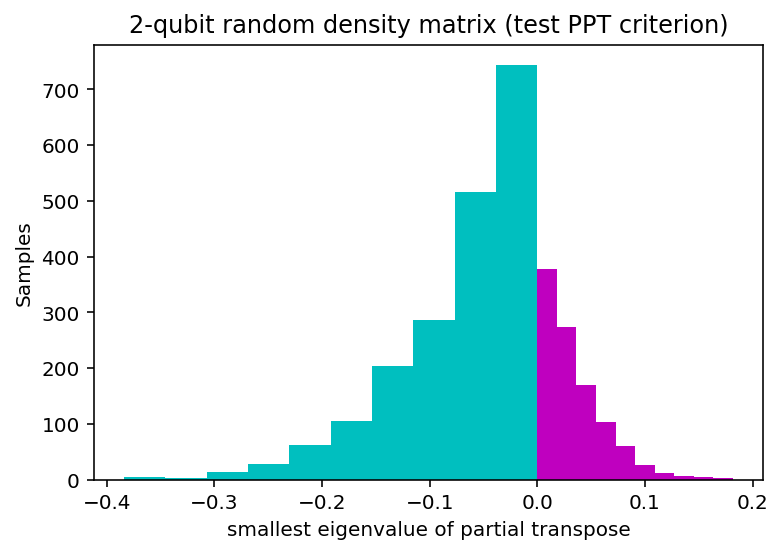

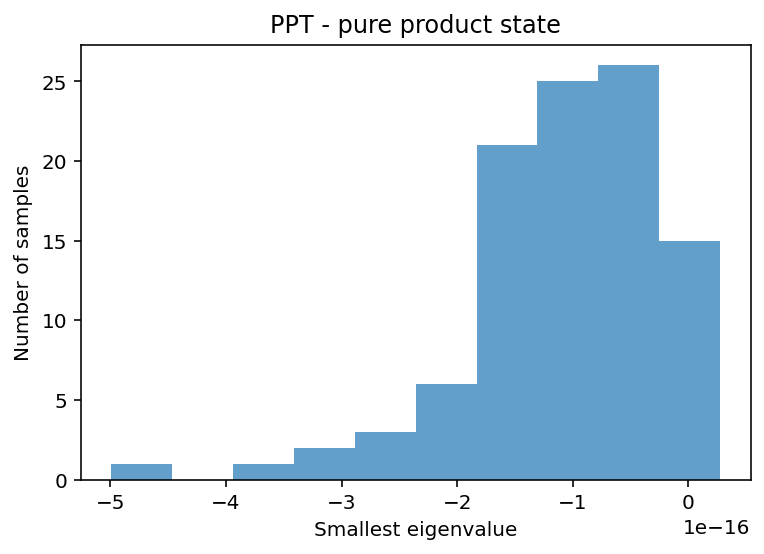

In [34]:
# ppt_criterion(rand_dm(N=4, dims=[[2, 2], [2, 2]]))
generate_two_qubit_random_state_PPT(3000,plot=True)

# generate_two_qubit_random_state_PPT(1000)
# [ppt_criterion(dm) for dm in [ket2dm(ket) for ket in generate_two_qubit_product_pure_state(100)]]
[ppt_criterion(dm) for dm in generate_bell_like_pure_state(10)]

for state in generate_rand_product_state(n=2,m=3):
    eigen_val = ppt_criterion(state)
    print(eigen_val)
# print(rand_dm(N=4,dims=[[2,2],[2,2]]) )

fig, ax = plt.subplots(figsize=(6, 4))

smallest_eigen_list_entangled = [ ppt_criterion(state) for state in generate_rand_product_state(n=2,m=100) ]
# print(smallest_eigen_list_entangled)
# print(np.array(smallest_eigen_list_entangled).flatten())
ax.set_ylabel('Number of samples')
ax.set_xlabel('Smallest eigenvalue')
ax.set_title('PPT - pure product state')
ax.hist(np.array(smallest_eigen_list_entangled), alpha=0.7)


### Visualize dataset samples

generate_noisy_ghz_ensemble: 3 qubits, 10 samples


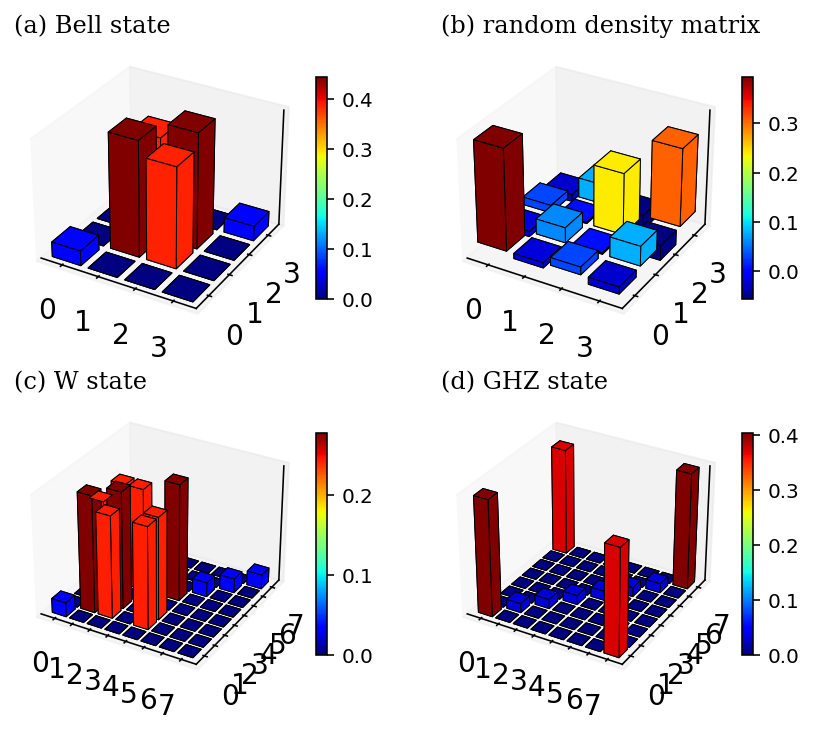

In [4]:
size_train = 10

# visualization
# fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(7, 6))
# fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_title('(a) Bell state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(random.choice(generate_bell_noisy_density(m=size_train,kind='10',noise_limit=1/3)), fig=fig, ax=ax)
# xlabels=['00', '01', '10', '11'],
# ylabels=['00', '01', '10', '11'],
# title="a random two qubit entangled state",

# set up the axes for the second plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.set_title('(b) random density matrix', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(random.choice([rand_dm(N=4, dims=[[2, 2], [2, 2]]) for i in range(size_train)]), fig=fig, ax=ax)

# W
w_3_density = generate_noisy_w_ensemble(3,size_train,1/3)
# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.set_title('(c) W state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(random.choice(w_3_density), fig=fig, ax=ax)

# GHZ
ghz_3_density = generate_noisy_ghz_ensemble(3,size_train,1/3)
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.set_title('(d) GHZ state', fontfamily='serif', loc='left', fontsize='large')
matrix_histogram(random.choice(ghz_3_density), fig=fig, ax=ax)

plt.savefig('dataset_sample.png', dpi=300)



### 2-qubit case

### Bell, CHSH inequalities as entanglement witness

the Bell inequality
$$ \langle a_0b_0, a_0b_0', a_0'b_0, a_0'b_0' \rangle$$
with $a_0=\sigma_x$, $a_0'=\sigma_x$, $b_0=(\sigma_x-\sigma_z)/\sqrt{2}$, and $b_0'=(\sigma_x+\sigma_z)/\sqrt{2}$

the CHSH inequality
$$ \langle \rangle$$


In [5]:
a_0 = sigmaz()
a_1 = sigmax()
b_0 = (sigmax() - sigmaz() )/sqrt(2)
b_1 = (sigmax() + sigmaz())/sqrt(2)

bell_ansatz = [ tensor(a_0,a_1), tensor(a_1,b_0), tensor(a_1,b_1), - tensor(a_0,b_1) ]
bell_inequality = tensor(a_0,a_1) + tensor(a_1,b_0) + tensor(a_1,b_1) - tensor(a_0,b_1) 


In [1]:
p * ket2dm(w_state(3)) + (1 - p) / 2**3 * qeye([2 for j in range(3)])

NameError: name 'p' is not defined

least eigenvale:  4.1078251911129996e-17 when p= 0.2
least eigenvale:  0.00035145515467440374 when p= 0.209


Text(0, 0.5, 'least eigenvalue / Tr(W rho)')

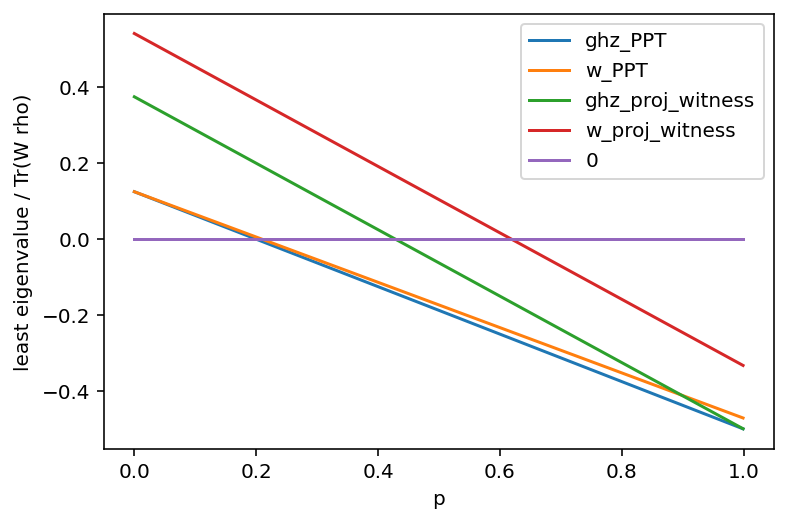

In [28]:
# determine to what extent white noise the Bell/GHZ/W state is not entangled
size = 1000
white_noise_list = [i / size for i in range(size)]
# white_noise_list
white_noise_www = [
    p * ket2dm(w_state(3)) + (1 - p) / 2**3 * qeye([2 for j in range(3)])
    for p in white_noise_list
]

white_noise_ghz = [
    p * ket2dm(ghz_state(3)) + (1 - p) / 2**3 * qeye([2 for j in range(3)])
    for p in white_noise_list
]

# evaluate the least eigenvalues of partial transpose with partition (A|BC)
eigvals_ghz = np.array([ppt_criterion(rho) for rho in white_noise_ghz]).flatten()
eigvals_www = np.array([ppt_criterion(rho) for rho in white_noise_www]).flatten()

def find_maximal_p_entangle(eigval_list):
    for index, item in enumerate(eigval_list):
        if index < size - 1:
            if item * eigval_list[index + 1] < 0:
                print('least eigenvale: ', item,'when p=', index/size)

find_maximal_p_entangle(eigvals_ghz)
find_maximal_p_entangle(eigvals_www)

plt.plot(white_noise_list, eigvals_ghz)
plt.plot(white_noise_list, eigvals_www)
plt.plot(white_noise_list, [3/8-7/8*p for p in white_noise_list])
plt.plot(white_noise_list, [13/24-21/24*p for p in white_noise_list])
plt.plot(white_noise_list, np.array([0 for i in white_noise_list]))
plt.legend(['ghz_PPT','w_PPT','ghz_proj_witness','w_proj_witness','0'])
plt.xlabel('p')
plt.ylabel('least eigenvalue / Tr(W rho)')

[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]
[2, 2]


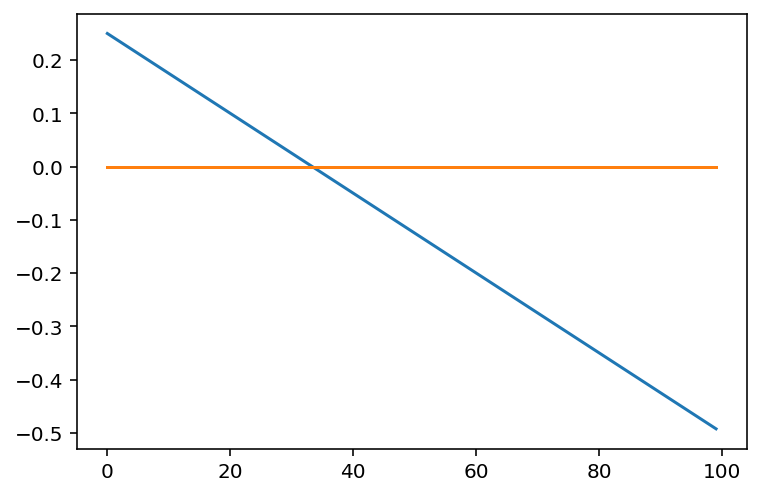

In [4]:
# determine to what extent white noise the Bell state is not entangled
size = 100
white_noise_list = [ i/size for i in range(size) ]
# white_noise_list
white_noise_bell00 = [ p * ket2dm(bell_state('00')) + (1 - p) / 4 * identity([2, 2])  for p in white_noise_list ]
# white_noise_bell00
# np.array([ppt_criterion(rho) for rho in white_noise_bell00]).flatten()
plt.plot(np.array([ppt_criterion(rho) for rho in white_noise_bell00]).flatten())
plt.plot(np.array([0 for i in range(size)]))

In [10]:

# number_samples = 1000
size_train = 3
noise_limit = 1/3

bell_kinds = ['00', '01', '10', '11']
pauli_str = ['I', 'X', 'Y', 'Z']
two_pauli = [tensor([a,b]) for a in pauli_operators for b in pauli_operators ]
two_pauli_label = [a+b for a in pauli_str for b in pauli_str ]
print('All two-qubit Pauli observables:', two_pauli_label)
# print(two_pauli)

state_0 = [generate_bell_noisy_density(size_train,kind='11',noise_limit=noise_limit), const_label(0,size_train)]
state_1 = [generate_rand_product_state(n=2,m=size_train,noise_limit=noise_limit), const_label(1,size_train)]
X, y = construct_training_dataset([state_0,state_1], two_pauli)


All two-qubit Pauli observables: ['II', 'IX', 'IY', 'IZ', 'XI', 'XX', 'XY', 'XZ', 'YI', 'YX', 'YY', 'YZ', 'ZI', 'ZX', 'ZY', 'ZZ']
generate_rand_pure_product_state+noise: 2 qubits, 3 samples
------- construct_training_dataset -------
number of samples: 6 ; number of labels: 6 ; dimension: (6, 16)
------------------- end -------------------


In [22]:
import itertools

ranges = [range(0, 2), range(1, 3), range(2, 4)]

# for xs in itertools.product(*ranges):
#     print(*xs)
[ list(i) for i in itertools.product(*ranges) ]

[[0, 1, 2],
 [0, 1, 3],
 [0, 2, 2],
 [0, 2, 3],
 [1, 1, 2],
 [1, 1, 3],
 [1, 2, 2],
 [1, 2, 3]]

In [31]:
# pauli_operators = [qeye(2), sigmax(),sigmay(),sigmaz()]
I, X, Y, Z = qeye(2), sigmax(), sigmay(), sigmaz()

def pauli_tensor_observables(n):
    pauli_operators = [qeye(2), sigmax(),sigmay(),sigmaz()]
    
    return [ tensor(list(pauli)) for pauli in itertools.product(*[pauli_operators for i in range(n)]) ]

def pauli_tensor_labels(n):
    pauli_str = ['I', 'X', 'Y', 'Z']

    return [ ''.join(list(pauli)) for pauli in itertools.product(*[pauli_str for i in range(n)]) ]

print('All two-qubit Pauli observables:', pauli_tensor_labels(2))

All two-qubit Pauli observables: ['II', 'IX', 'IY', 'IZ', 'XI', 'XX', 'XY', 'XZ', 'YI', 'YX', 'YY', 'YZ', 'ZI', 'ZX', 'ZY', 'ZZ']


### Fidelity witness

### machine learning ansatz

noise limit: 0.3333333333333333
generate_rand_product_state: 2 qubits, 400 samples
------- construct_training_dataset -------
number of samples: 800 ; number of labels: 800 ; dimension: (800, 16)
------------------- end -------------------
=========================== SVM summary start ============================
size of training set: 800 ; size of testing set: 100
kernel method: rbf
score (train): 1.0
score (test): 1.0
number of entangled state: 64
number of separable state: 36
accuracy of prediction (other entangled): 0.0
============================= SVM summary end ==============================


(1.0, 1.0)

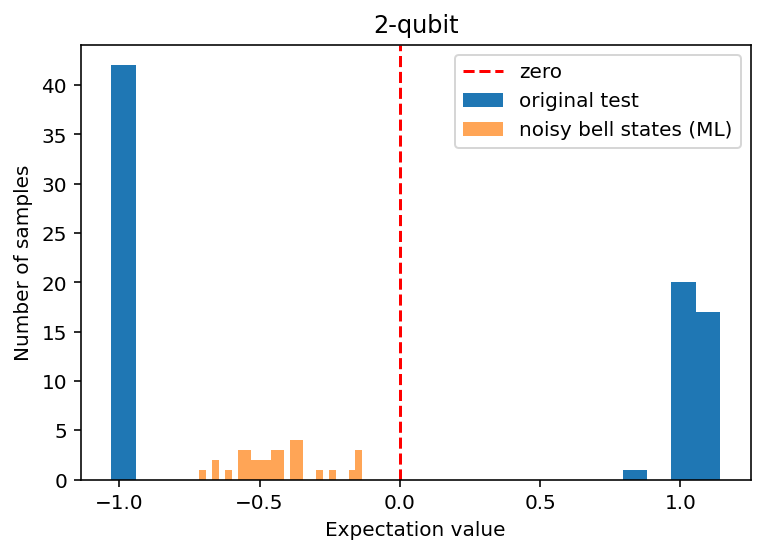

In [196]:



# traing with the entries of the density matrix

size_train = 100
size_test = 100
bell_noise = 1 / 3
print('noise limit:', bell_noise)

bell00_noisy = generate_bell_noisy_density(size_train, '00', bell_noise)
# print(bell00_noisy_density[0])
bell01_noisy = generate_bell_noisy_density(size_train, '01', bell_noise)
bell10_noisy = generate_bell_noisy_density(size_train, '10', bell_noise)
bell11_noisy = generate_bell_noisy_density(size_train, '11', bell_noise)

bell_like_train = bell00_noisy + bell01_noisy + bell10_noisy + bell11_noisy

two_qubit_product_states_train = generate_rand_product_state(
    n=2, m=len(bell_like_train))

# labels = [
#     const_label(0, size_train),
#     const_label(0, size_train),
#     const_label(0, size_train),
#     const_label(0, size_train),
#     const_label(1, len(two_qubit_product_states_train))
# ]
# print(labels)

X, y = construct_training_dataset(
    states_labels = [[bell_like_train,const_label(0,len(bell_like_train))], [two_qubit_product_states_train, const_label(1,len(bell_like_train))]],
    # states=[bell_like_train, two_qubit_product_states_train],
    # labels=labels,
    operators=two_pauli)


# (X, Y) = assemble_training_dataset(size_train)
legends = ['zero', 'original test','noisy bell states (ML)', 'separable states (ML)', 'random density matrices (ML)', 'bell inequality']
my_svm(X=X, y=y, size_test=size_test, kernel='rbf', legend=legends, rfe=True)
# my_svm(X, Y, 1000, 100, 'linear')


### distinguish bi-separable with entangled (2-qubit)

In [16]:
size_train = 1000
train_score_list = []
test_score_list = []
sample_size_list = [200, 300, 600, 800, 1000]
for index, size_train in enumerate(sample_size_list):
    print(f'################ iteration {index}, size of training set: {size_train} ################')
    two_qubit_random_state_PPT = generate_two_qubit_random_state_PPT(size_train,plot=False)
    size = int(0.3*size_train)
    entangled_sample = [two_qubit_random_state_PPT[0][:size], const_label(0,size)]
    separable_sample = [two_qubit_random_state_PPT[1][:size], const_label(1,size)]

    # labels = [ const_label(0,len(entangled_sample)) , const_label(1,len(separable_sample)) ]

    states_labels = [entangled_sample, separable_sample]
    X,y = construct_training_dataset(states_labels=states_labels,operators=two_pauli)
    # X,y = construct_training_dataset(states=[entangled_sample,separable_sample],labels=labels,operators=two_pauli)
    train_score, test_score = my_svm(X=X, y=y, size_test=int(0.1*size_train), kernel='linear',legend=['zero','test - PPT','bell'],rfe=True)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    # my_svm(X=X, y=y, size_test=100, kernel='rbf',legend=['zero','test - PPT','bell'])


plot_score(sample_size_list,train_score_list,test_score_list)


################ iteration 0, size of training set: 200 ################
# entangled state: 127 ; # separable state: 73
------- construct_training_dataset -------
number of samples: 120 ; number of labels: 120 ; dimension: (120, 16)
------------------- end -------------------
=========================== SVM summary start ============================
size of training set: 120 ; size of testing set: 20
kernel method: linear kernel
---- recursive feature elimination ----
feature ranking: [14 12  7  1  1  4  8 10  3 11  2  9 13  5  1  6]
----------------------------------------


NameError: name 'two_pauli_label' is not defined

##### Two-qutrit, Two-qudit


In [102]:
# qutrit_basis()
x = basis(3, 2)
M = ket2dm(x)
print(M)


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


### Three-qubit case

fully separable, biseparable

GME, fully entanglement

#### Different fidelity witness, different white noise limit (unfaithful)

generate_noisy_ghz_ensemble: 3 qubits, 1000 samples
generate_rand_product_density: 3 qubits, 1000 samples
generate_noisy_ghz_ensemble: 3 qubits, 1000 samples
generate_rand_product_density: 3 qubits, 1000 samples
generate_noisy_ghz_ensemble: 3 qubits, 1000 samples
generate_rand_product_density: 3 qubits, 1000 samples
generate_noisy_ghz_ensemble: 3 qubits, 1000 samples
generate_rand_product_density: 3 qubits, 1000 samples


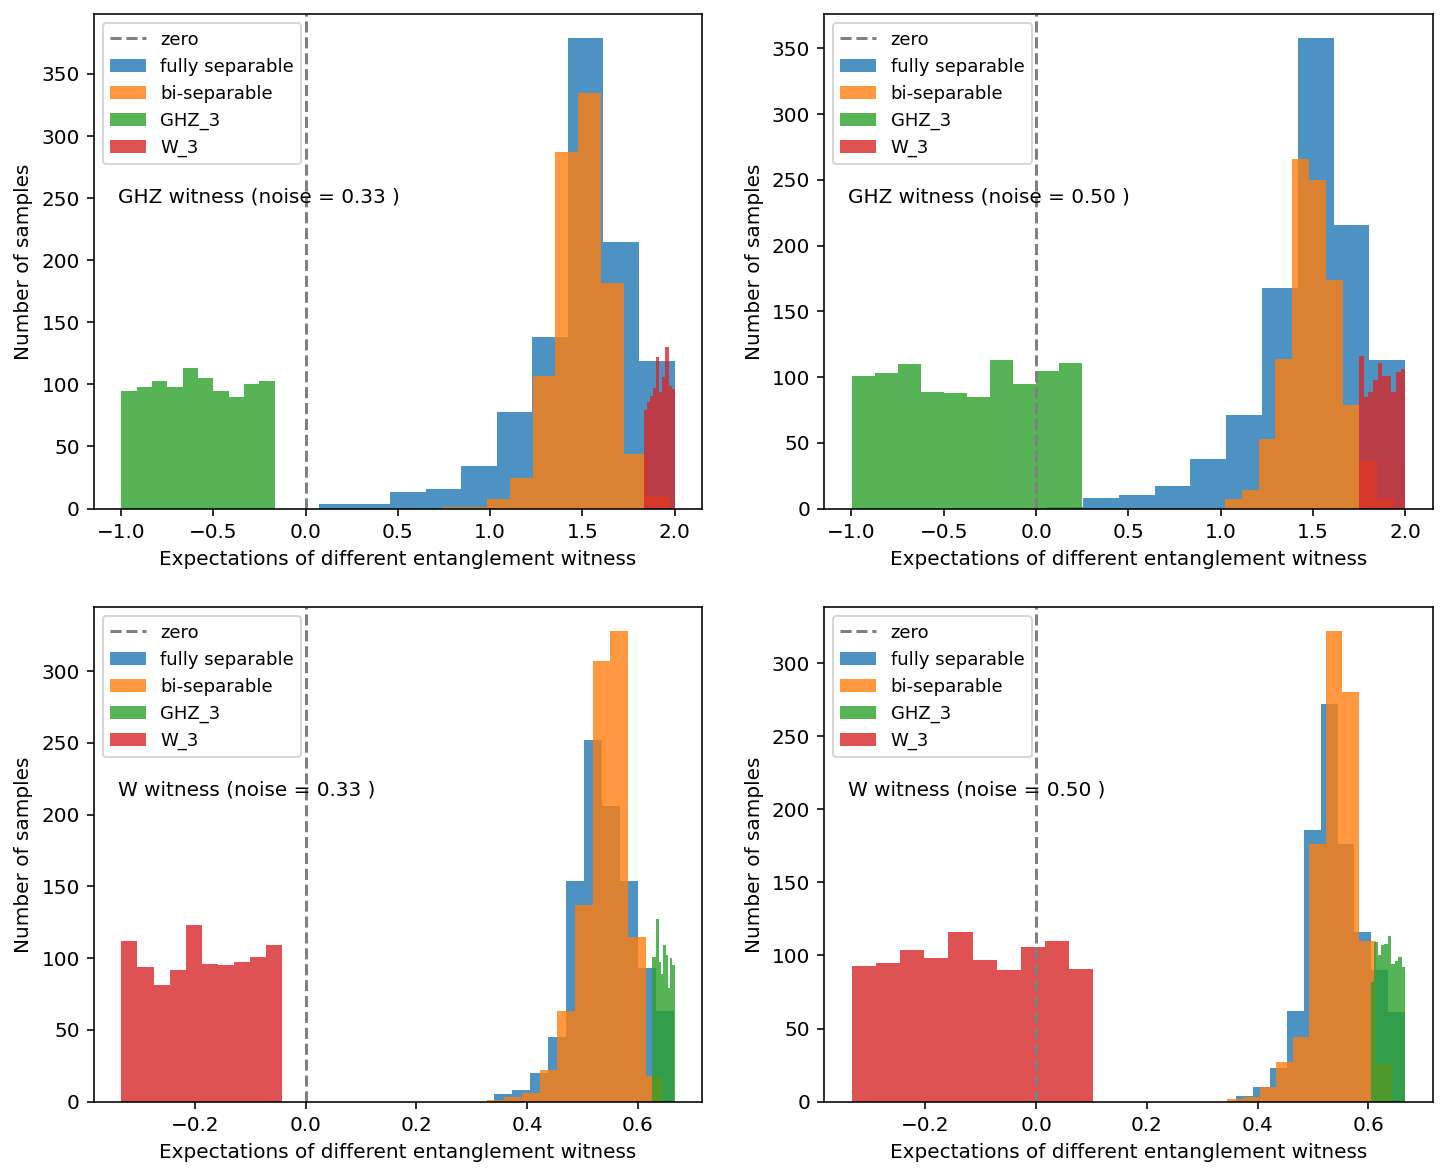

In [8]:


size_train = 1000
size_test = 1000

# noise_limit = 1/5
to_features = 5

# three-qubit tomographic ansatz
three_pauli = [tensor([a,b,c]) for a in pauli_operators for b in pauli_operators for c in pauli_operators]
three_pauli = random.sample(three_pauli,to_features)



# rigorous entanglement witness - local measurements
witness_ghz_3 =  3/2 * qeye([2, 2, 2]) - tensor([sigmax(), sigmax(), sigmax()]) - 1/2 * (tensor([sigmaz(), sigmaz(), qeye([2])]) + tensor([qeye([2]), sigmaz(), sigmaz()]) + tensor([sigmaz(), qeye([2]), sigmaz()]))
# rigorous entanglement witness - projection
witness_w_3_project = 2/3 * qeye([2, 2, 2]) - ket2dm(w_state(N=3))
# witness_ghz_3_project = 1/2 * qeye([2, 2, 2]) - ket2dm(ghz_state(N=3))

# generate_noisy_biseparable(1,2,10,1/3)
# generate_rand_product_density(3,1,0)

# fig, ax = plt.subplots(figsize=(6, 4))
# fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4))
# ax0 = plt.subplot(1,2,1)
# ax1 = plt.subplot(1,2,2)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# for index, item in enumerate(ranking):
for i, noise_limit in enumerate([1/3, 1/2]):
    for j, witness in enumerate([witness_ghz_3, witness_w_3_project]):
        ## generate training data
        # GHZ and W state samples with white noise
        ghz_3_density = generate_noisy_ghz_ensemble(n=3,m=size_train,noise_limit=noise_limit)
        w_3_density = generate_noisy_w_ensemble(n=3,m=size_train,noise_limit=noise_limit)

        # test GHZ3/W3 projection witness
        three_qubit_legends = ['zero', 'fully separable','bi-separable','GHZ_3','W_3']
        three_qubit_witness_expectation_list = [
            [expect(witness, state) for state in test_set] for test_set in
            # [expect(witness_ghz_3, state) for state in test_set] for test_set in
            [
                generate_rand_product_density(3, size_train, 0),
                generate_noisy_biseparable(1, 2, size_train, 1/3), 
                ghz_3_density,
                w_3_density
            ]
            # [generate_rand_product_state(3, size_train), ghz_3_density, w_3_density]
        ]
        if j == 0:
            title = f'GHZ witness (noise = {noise_limit:.2f} )'
        else:
            title = f'W witness (noise = {noise_limit:.2f} )'
        plot_expectation_hist(axs[j, i],
                              three_qubit_witness_expectation_list,
                              three_qubit_legends,
                              title=title)

plt.savefig('fidelity_witness_compare.png', dpi=400)

In [32]:
x = list(range(1, 10))
y = list("abcdefghij")
m = 3

x_sub, y_sub = zip(*random.sample(list(zip(x, y)), m))
x_sub[2]

4

### machine learning ansatz

generate_rand_product_density_matrix: 3 qubits, 1000 samples
generate_noisy_ghz_ensemble: 3 qubits, 1000 samples
------- construct_training_dataset -------
number of samples: 4000 ; number of labels: 4000 ; dimension: (4000, 10)
------------------- end -------------------
number of features 10
selected pauli operators: ['YXI', 'YXY', 'ZZI', 'IXX', 'III', 'IZX', 'ZIX', 'ZXI', 'ZII', 'XYY']
train score: 0.9930555555555556
test score: 0.99
generate_rand_product_density_matrix: 3 qubits, 1000 samples
generate_noisy_ghz_ensemble: 3 qubits, 1000 samples


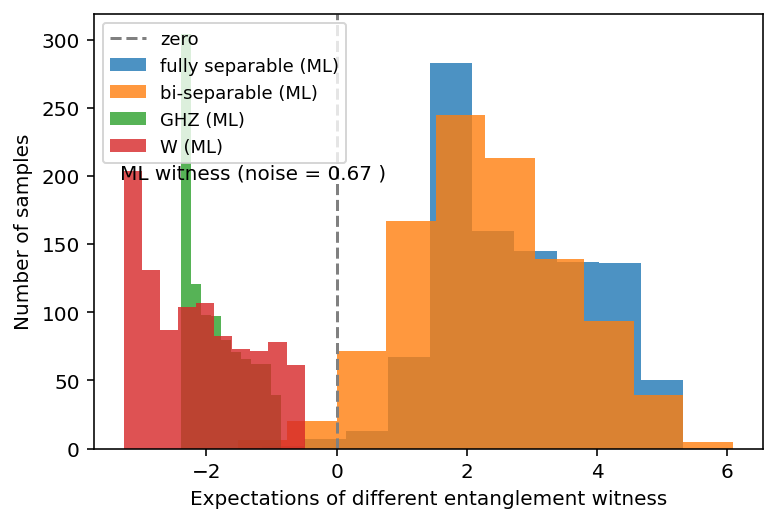

In [58]:
size_train = 1000
size_test = 1000

noise_limit = 4/6
to_features = 10
# three-qubit tomographic ansatz
three_pauli = [tensor([a,b,c]) for a in pauli_operators for b in pauli_operators for c in pauli_operators]
three_pauli_label = [a+b+c for a in pauli_str for b in pauli_str for c in pauli_str ]
three_pauli_subset, three_pauli_label_subset = zip(*random.sample(list(zip(three_pauli, three_pauli_label)), to_features))
three_pauli_subset = list(three_pauli_subset)
three_pauli_label_subset = list(three_pauli_label_subset)
# print(len(three_pauli_subset))
# print(three_pauli)
# print(three_pauli_subset)


##################### training ########################
# input_states = [generate_rand_product_state(3, 2 * size_train), ghz_3_density, w_3_density]
# labels = [ [1 for i in range(2 * size_train)], [0 for i in range(size_train) ], [0 for i in range(size_train)] ]
# print(labels)
fully_sep_data = [ generate_rand_product_state(3, size_train,noise_limit=noise_limit,is_pure=False), const_label(1, size_train) ]
# fully_sep_data = [generate_rand_product_density(3, size_train, 0), const_label(1,size_train)]
bi_sep_data = [generate_noisy_biseparable(1, 2, size_train, noise_limit), const_label(1,size_train)]
ghz3_data = [generate_noisy_ghz_ensemble(n=3,m=size_train,noise_limit=noise_limit), const_label(0,size_train)]
w3_data = [generate_noisy_w_ensemble(n=3,m=size_train,noise_limit=noise_limit), const_label(0,size_train)]

X, y = construct_training_dataset(
    states_labels=[fully_sep_data, bi_sep_data, ghz3_data, w3_data],
    operators=three_pauli_subset)
print('number of features', len(X[0]))
print('selected pauli operators:',three_pauli_label_subset)
# print(Y)
n_sample = len(X)
X_train = X[:int(0.9 * n_sample)]
# print(X_train)
y_train = y[:int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample):]
y_test = y[int(0.9 * n_sample):]

clf = svm.SVC()
clf.fit(X_train, y_train)
print('train score:', clf.score(X_train, y_train))
print('test score:', clf.score(X_test, y_test))

##################### testing ########################
# fully_sep_test = generate_rand_product_density(3, size_test)
fully_sep_test = generate_rand_product_state(3, size_test,noise_limit=noise_limit,is_pure=False)
bi_sep_test = generate_noisy_biseparable(1, 2, size_test, noise_limit)
ghz3_test = generate_noisy_ghz_ensemble(n=3,m=size_test,noise_limit=noise_limit)
w3_test = generate_noisy_w_ensemble(n=3,m=size_test,noise_limit=noise_limit)
test_dataset = [fully_sep_test, bi_sep_test, ghz3_test, w3_test]
# test_1 = generate_two_qubit_random_pure_state_PPT(size_test)[1]

comparison_legend = ['zero', 'fully separable (ML)', 'bi-separable (ML)', 'GHZ (ML)', 'W (ML)']
# three_qubit_legend = ['zero', 'fully separable (GHZ witness)', 'GHZ3 (GHZ witness)', 'W3 (GHZ witness)', 'fully separable (W witness)','W3 (W witness)', 'GHZ (W witness)', 'fully separable (ML)', 'GHZ (ML)', 'W (ML)']
decision_test = []
for test_data in test_dataset:
    feature_test = [expect(three_pauli_subset, state) for state in test_data]
    prediction_test = clf.predict(feature_test)
    # print(prediction_three_1)
    decision_test.append( clf.decision_function(feature_test) )

fig, ax = plt.subplots(figsize=(6, 4))
title = f'ML witness (noise = {noise_limit:.2f} )'
plot_expectation_hist(ax, decision_test, comparison_legend,title=title)

##################### plot ########################

# fig.show()
plt.savefig('three_qubit_hist_ML.png', dpi=300)


### Feature elimination

In [13]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py


### Stabilizer - few local measurement

### Non-stabilizer
W state, sqrt(SWAP)

### different partitions

### Coherent noise
local unitary, rotation, phase error

### Unfaithful state - large white noise
#### W state
#### Cluster

##### mixed state

Werner state

In [377]:
# plot_expectation_values(results, ylabels=[], title=None, show_legend=False, fig=None, axes=None, figsize=(8, 4))

# plot_wigner_sphere(fig, ax, wigner, reflections)

#### More qubit case

graph state - ring
....

2D cluster state

## Versions of software package/module 

In [13]:
# about()
# conda list
# from qutip.ipynbtools import version_table
# version_table()
# qutip.cite()

print('numpy version:', np.__version__)
print('matplotlib version', mpl.__version__)

import sklearn
print('Scikit-learn version:', sklearn.__version__)
print('QuTiP version:', qutip.__version__)

numpy version: 1.21.5
matplotlib version 3.5.1
Scikit-learn version: 1.1.2
QuTiP version: 4.7.0
